In [417]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '../python')
from measurements import *

plotter = Plotter()

from fitv2 import *


import h5py


from scipy.optimize import curve_fit
from scipy.integrate import quad

from scipy.interpolate import interp1d
from scipy.optimize import minimize 

#processedDataDir = "../data/processedv1/"
#processedDataDir = "../data/processedv2/"
#processedDataDir = "../data/processedv3/"
processedDataDir = "../python/"
#processedDataDir = "../data/processedv3/"

gdir = '../gnuplot_data/'

%load_ext gnuplot_kernel


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The gnuplot_kernel extension is already loaded. To reload it, use:
  %reload_ext gnuplot_kernel


In [435]:
%gnuplot inline jpeg enhanced

In [419]:
%%gnuplot


gdir = '../gnuplot_data/'

 set linetype  1 lc rgb "dark-violet" lw 1
 set linetype  2 lc rgb "#009e73" lw 1
 set linetype  3 lc rgb "#56b4e9" lw 1
 set linetype  4 lc rgb "#e69f00" lw 1
 set linetype  5 lc rgb "#f0e442" lw 1
 set linetype  6 lc rgb "#0072b2" lw 1
 set linetype  7 lc rgb "#e51e10" lw 1
 set linetype  8 lc rgb "black"   lw 1
 set linetype  9 lc rgb "gray50"  lw 1
 set linetype cycle  9

# Dynamical correlators

# Broken phase

In [465]:
dataminus = ConfResults(fn="../data/zminus2_N080_m-0501265_h003684_c00500.h5",thTime=1000,dt=0.8, data_format="new", processedDir=processedDataDir, plotDir=gdir)

In [ ]:
dataminus.loadAv('V1')

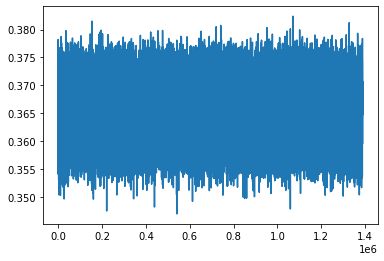

In [186]:
plt.plot(dataminus.av['phi0'])

In [34]:
test = np.arange(0,10)

In [40]:
test[0:-1:3]

array([0, 3, 6])

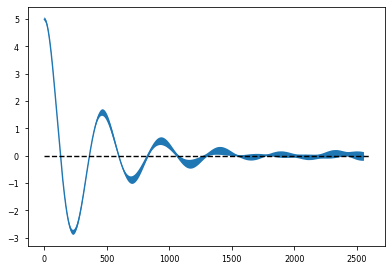

In [466]:
dataminus.load("OtOttp","A", direc=processedDataDir)
#dataminus.load("OtOttpFourier","A", direc=processedDataDir)
dataminus.load("OtOttp_blocks","A", direc=processedDataDir)

#dataminus.computeOtOtpBlocked("A", momNum = 0, tMax = 5000.0, blockSizeT = 200000.0,  errFunc = lambda x : jackknife(x,50), parallel=True)
plotter.plot(dataminus,"OtOttp","A",tMax = 3200)
plt.plot([0,2600],[0,0],'--k')
#plt.yscale('log')

In [70]:
dataminus.save("OtOttp","A", fmt = "gnuplot")


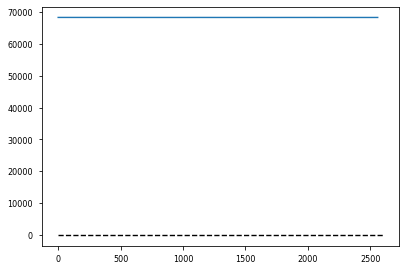

In [467]:
dataminus.load("OtOttp","dsigma", direc=processedDataDir)
#dataminus.load("OtOttpFourier","dsigma", direc=processedDataDir)
dataminus.load("OtOttp_blocks","dsigma", direc=processedDataDir)

#dataminus.computeOtOtpBlocked("dsigma", momNum = 0, tMax = 5000.0, blockSizeT = 200000.0,  errFunc = lambda x : jackknife(x,50), parallel=True)
plotter.plot(dataminus,"OtOttp","dsigma",tMax = 3200)
plt.plot([0,2600],[0,0],'--k')
#plt.yscale('log')

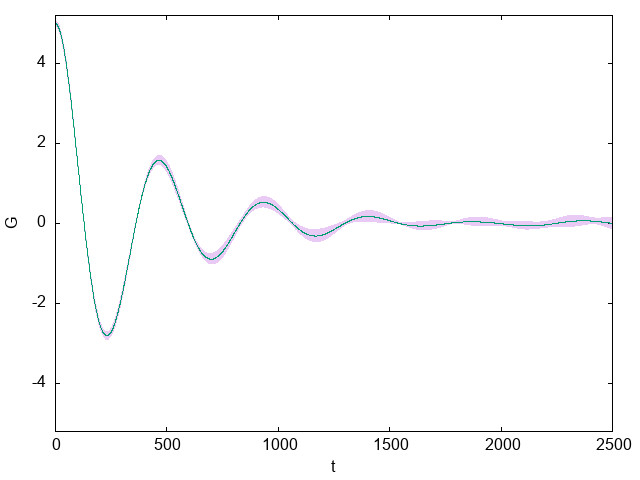


[?
[?
[?
[?
[?
[?
[?
[?
[?
[?
[?

In [74]:
%%gnuplot

set style fill transparent solid 0.2 noborder

set xlabel 't'
set ylabel 'G'
set xrange [0:2500]
set yrange [-5.2:5.2]

plot gdir.'zminus2_N080_m-0501265_h003684_c00500_OtOttp_A.txt'  using 1:($2+$4):($2-$4)  with filledcurves notitle, \
        '' with lines notitle 

In [28]:
dataminus.computeOtOtpBlocked('A', momNum = 0, tMax = 5000.0, nBlocks = 5,  decim = 50, errFunc = lambda x : (np.mean(x, axis = 0), np.std(x, axis = 0)), parallel=False)

In [ ]:
%%time
dataminus.computeOtOtp('A',5000,-1, lambda x : bootstrap(x,50), decim = 400)

In [44]:
#plotter.plot(dataminus,"OtOttp","A")
#plt.plot([0,5000],[0,0],'--k')
#plt.xlim(0,5000)
#plt.yscale('log')

In [247]:
dataminus.computeStatisticalCor('A', omMax=0.1, errFunc=lambda x: (np.mean(x,axis=0), np.std(x,axis=0)),  myTmax=40000.0, filterFunc=lambda x : np.exp(-x**2 / 2000.0**2))


True


In [248]:
dataminus.OtOttpFourier_omspeak_blocks['A']

[0.013037609512397642,
 0.013037609512397642,
 0.01350884841043611,
 0.013194689145077132,
 0.013194689145077132]

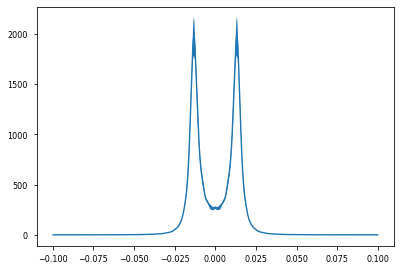

In [249]:
plotter.plot(dataminus,"OtOttpFourier","A", yfact =1)
#plt.yscale('log')

In [57]:
np.sum(np.real(dataminus.OtOttpFourier['A'].mean)) * dw / 2.0 / np.pi

5.115549191768563

In [8]:
dw = np.abs(dataminus.OtOttpFourier_oms['A'][0] - dataminus.OtOttpFourier_oms['A'][1])

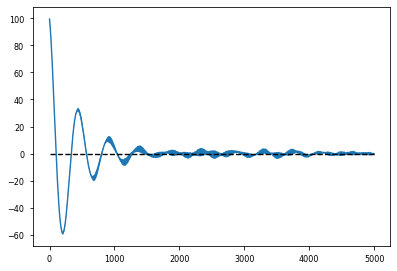

In [69]:
dataminus.load("OtOttp","phi", direc=processedDataDir)
dataminus.load("OtOttpFourier","phi", direc=processedDataDir)
dataminus.load("OtOttp_blocks","phi", direc=processedDataDir)

#dataminus.computeOtOtpBlocked("phi", momNum = 0, tMax = 5000.0, blockSizeT = 20000.0,  errFunc = lambda x : (np.mean(x,axis=0), np.std(x,axis=0)), parallel=True)
plotter.plot(dataminus,"OtOttp","phi")
plt.plot([0,5000],[0,0],'--k')

In [307]:
0.365 / 0.003684

99.07709011943538

In [126]:
dataminus.OtOttp['phi'].mean[0]

(99.41991400354169+0j)

From the static correcator, we expect $\frac{\sigma^2}{\sigma^2 m^2} = \frac{\sigma^2}{m_p^2 \chi_0}$

In [196]:
1.0/0.014**2/5.0*0.365**2

135.94387755102036

In [ ]:
0.014 

In [71]:
dataminus.OtOttp['phi'].mean[0]/(1/0.014**2 / 5.0 )**0.5

(3.112335604407435+0j)

In [72]:
dataminus.computeStatisticalCor('phi', omMax=0.1, errFunc=lambda x: (np.mean(x,axis=0), np.std(x,axis=0)),  myTmax=10000.0, filterFunc=lambda x : np.exp(-x**2 / 2000.0**2))


True


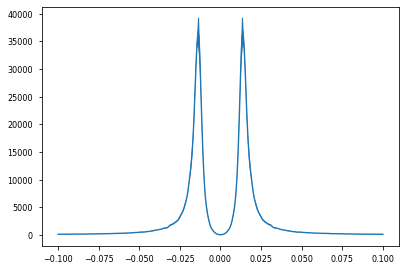

In [73]:
plotter.plot(dataminus,"OtOttpFourier","phi", yfact = 1)


[0.014, 10, 0.005]


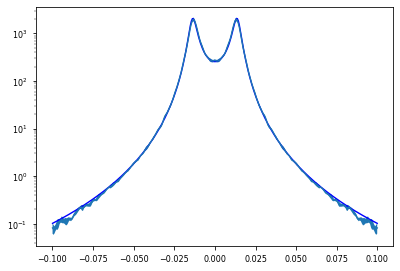

In [150]:
fitminus=Fitter(dataminus)
fitminus.setParValues("OtOttpFourier", "A", [0.014,10,0.005])
fitminus.plot("OtOttpFourier","A")
plotter.plot(dataminus,"OtOttpFourier","A")
plt.yscale('log')

[0.013929484275470472, 9.831734059810435, 0.005016566667088274]


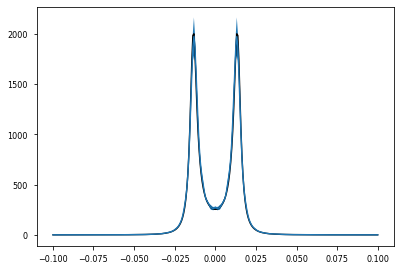

In [105]:
fitminus.fit("OtOttpFourier", "A")
fitminus.plot("OtOttpFourier","A", color="k")
plotter.plot(dataminus,"OtOttpFourier","A")

In [106]:
fitminus.averagechi2reduce

{'OtOttpFourier': {'A': 1.5964477597309406}}

In [107]:
print(fitminus.par)
print(fitminus.parErr)
print(fitminus.parName)

{'OtOttpFourier': {'A': [0.013929484275470472, 9.831734059810435, 0.005016566667088274], 'phi': array([0., 0., 0.]), 'dphi': array([0., 0., 0.]), 'Aphi': array([0., 0., 0., 0.])}}
{'OtOttpFourier': {'A': array([2.01122277e-05, 7.67884131e-02, 3.51457404e-05])}}
{'OtOttpFourier': {'A': ['mp', 'amplitudeA', 'gammap'], 'phi': ['mp', 'amplitudephi', 'gammap'], 'dphi': ['mp', 'amplitudephi', 'gammap'], 'Aphi': ['mp', 'amplitudeA', 'amplitudephi', 'gammap']}}


The amplitude we expect is $2\chi_0$.

In [189]:
2 * 5.0

10.0

[0.016, 500, 0.1]


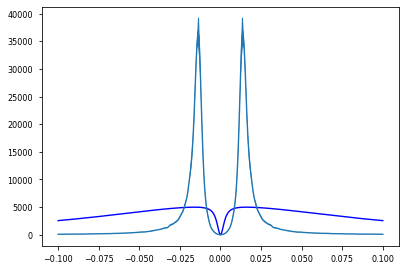

In [159]:
fitminus.setParValues("OtOttpFourier", "phi", [0.016,500,0.1])
fitminus.plot("OtOttpFourier","phi")
plotter.plot(dataminus,"OtOttpFourier","phi")

[0.01382750478766237, 0.037784766438734296, 0.005123470397880192]


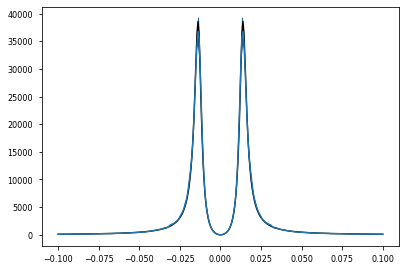

In [175]:
fitminus.fit("OtOttpFourier", "phi")
fitminus.plot("OtOttpFourier","phi", color="k")
plotter.plot(dataminus,"OtOttpFourier","phi")

In [137]:
fitminus.averagechi2reduce

{'OtOttpFourier': {'A': 1.5964477597309406, 'phi': 0.8640861395462582}}

The amplitude we expect is $\frac{2 \sigma^2}{\chi_0}$.

In [182]:
2.0 * 0.365**2 / 5.0 

0.05328999999999999

In [138]:
print(fitminus.par)
print(fitminus.parErr)
print(fitminus.parName)

{'OtOttpFourier': {'A': [0.013929484275470472, 9.831734059810435, 0.005016566667088274], 'phi': [0.013827551085131118, 1033556.9243801455, 0.0051235231639978895], 'dphi': array([0., 0., 0.]), 'Aphi': array([0., 0., 0., 0.])}}
{'OtOttpFourier': {'A': array([2.01122277e-05, 7.67884131e-02, 3.51457404e-05]), 'phi': array([2.26946493e-05, 8.38486552e+03, 3.50571234e-05])}}
{'OtOttpFourier': {'A': ['mp', 'amplitudeA', 'gammap'], 'phi': ['mp', 'amplitudephi', 'gammap'], 'dphi': ['mp', 'amplitudephi', 'gammap'], 'Aphi': ['mp', 'amplitudeA', 'amplitudephi', 'gammap']}}


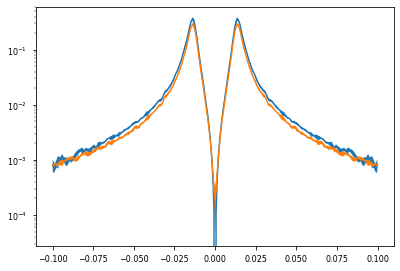

In [187]:
plotter.plot(dataminus,"OtOttpFourier","A", yfact = np.abs(dataminus.OtOttpFourier_oms['A']**2))


plotter.plot(dataminus,"OtOttpFourier","phi", yfact = 0.014**2/25.0  )


plt.yscale('log')

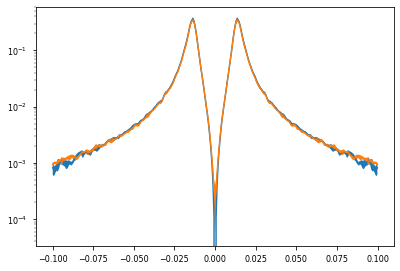

In [204]:
plotter.plot(dataminus,"OtOttpFourier","A", yfact = np.abs(dataminus.OtOttpFourier_oms['A']**2))


plotter.plot(dataminus,"OtOttpFourier","phi", yfact = 1.2 * 0.014**2/25.0  )


plt.yscale('log')

In [199]:
(0.365 / 0.31) ** 2

1.3863163371488034

In [279]:
dataminus.computeFourierPropagator("A",decim=50, errFunc = lambda x: blocking(x,5))

(0.0, 6.0)

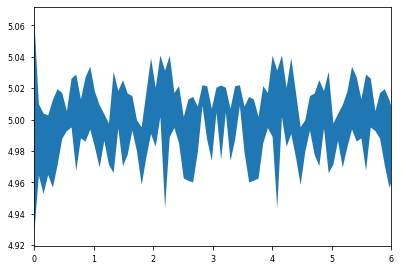

In [283]:
plotter.plot(dataminus,"propagator", "A", yfact=80**3)
plt.xlim([0,6])
#plt.ylim([40,50])

In [172]:
2 * 0.31**2  /5.0

0.03844

In [284]:
dataminus.save("propagator", "A")

In [304]:
dataminus.load("propagator", "V", direc=processedDataDir)

(4.9, 5.1)

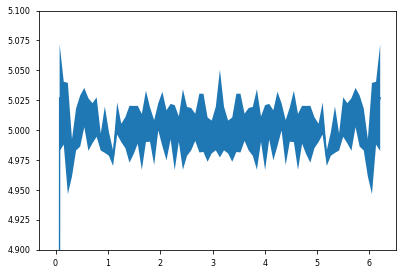

In [26]:
plotter.plot(dataminus,"propagator", "V", yfact=80**3)
plt.ylim([4.90,5.1])

#plt.yscale('log')

In [7]:
dataminus.load("propagator", "dsigma", direc=processedDataDir)

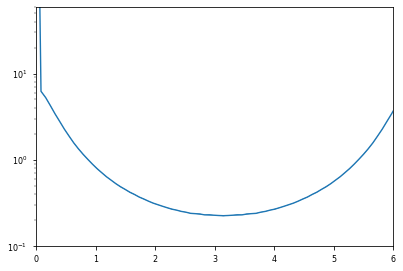

In [15]:
plotter.plot(dataminus,"propagator", "dsigma", yfact=80**3)
plt.ylim([0.1,60])
plt.xlim([0,6])
plt.yscale('log')

## Unbroken phase

In [422]:
dataplus = ConfResults(fn="../data/zplus_N080_m-0445648_h003684_c00500.h5",thTime=10000,dt=0.8, data_format="new", processedDir=processedDataDir, plotDir=gdir)

In [51]:
dataplus.OtOttp_blocks["A"][:,0]

array([5.41575098+0.j, 5.30865943+0.j, 5.05092693+0.j, 5.51298715+0.j,
       5.3240806 +0.j])

In [11]:
dataplus.computeOtOtpBlocked('A', momNum = 0, tMax = 5.0, nBlocks = 5,  decim = 50, errFunc = lambda x : (np.mean(x, axis = 0), np.std(x, axis = 0)), parallel=False)


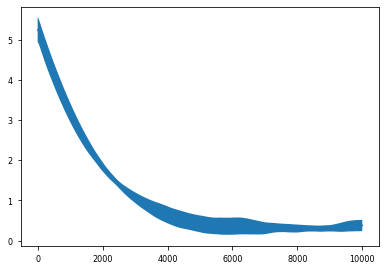

In [423]:
dataplus.load("OtOttp","A", direc=processedDataDir)
#dataplus.load("OtOttpFourier","A", direc=processedDataDir)
dataplus.load("OtOttp_blocks","A", direc=processedDataDir)

#dataminus.computeOtOtpBlocked("A", momNum = 0, tMax = 5000.0, blockSizeT = 200000.0,  errFunc = lambda x : jackknife(x,50), parallel=True)
plotter.plot(dataplus,"OtOttp","A")
#plt.plot([0,150],[0,0],'--k')
#plt.ylim(4.9,5.5)
#plt.xlim(0,5)
#plt.yscale('log')

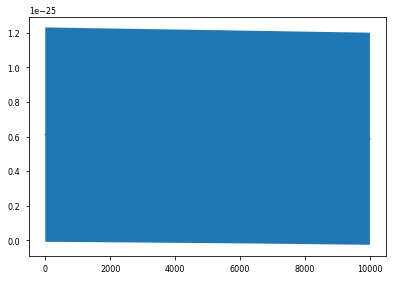

In [424]:
dataplus.load("OtOttp","V", direc=processedDataDir)
#dataplus.load("OtOttpFourier","A", direc=processedDataDir)
dataplus.load("OtOttp_blocks","V", direc=processedDataDir)

#dataminus.computeOtOtpBlocked("A", momNum = 0, tMax = 5000.0, blockSizeT = 200000.0,  errFunc = lambda x : jackknife(x,50), parallel=True)
plotter.plot(dataplus,"OtOttp","V")
#plt.plot([0,150],[0,0],'--k')
#plt.ylim(4.9,5.5)
#plt.xlim(0,5)
#plt.yscale('log')

In [25]:
int(len(dataplus.wallF["X"]['A1'][:,0])/5.0)

277577

In [ ]:
int(len(self.wallF["X"][keys[0]][:,0])

In [22]:
dataplus.OtOttp['A'].err[0]

0.32709387167632814

In [36]:
dataplus.computeStatisticalCor('A', omMax=0.1, errFunc=lambda x: (np.mean(x,axis=0), np.std(x,axis=0)),  myTmax=10000.0, filterFunc=lambda x : np.exp(-x**2 / 10000.0**2))


True


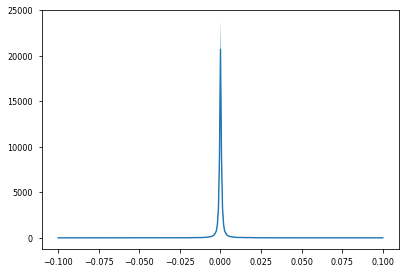

In [6]:
plotter.plot(dataplus,"OtOttpFourier","A", yfact = 1)


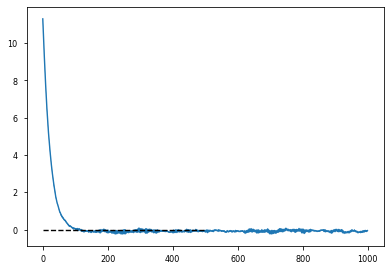

In [425]:
dataplus.load("OtOttp","phi", direc=processedDataDir)
dataplus.load("OtOttpFourier","phi", direc=processedDataDir)
dataplus.load("OtOttp_blocks","phi", direc=processedDataDir)

#dataminus.computeOtOtpBlocked("A", momNum = 0, tMax = 5000.0, blockSizeT = 200000.0,  errFunc = lambda x : jackknife(x,50), parallel=True)
plotter.plot(dataplus,"OtOttp","phi")
plt.plot([0,500],[0,0],'--k')
#plt.xlim(0,500)
#plt.yscale('log')

In [426]:
dataplus.computeStatisticalCor('phi', omMax=0.5, errFunc=lambda x: (np.mean(x,axis=0), np.std(x,axis=0)),  myTmax=20000.0, filterFunc=lambda x : np.exp(-x**2 / 200.0**2))

True


/Users/adrien/miniconda3/lib/python3.9/site-packages/scipy/interpolate/fitpack2.py:665: ComplexWarning: Casting complex values to real discards the imaginary part
  self._data = dfitpack.fpcurf0(x, y, k, w=w, xb=bbox[0],


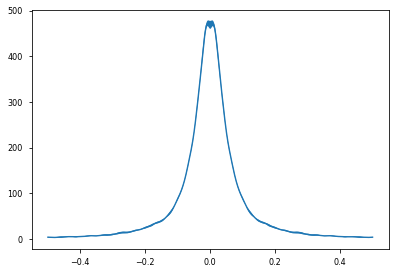

In [81]:
plotter.plot(dataplus,"OtOttpFourier","phi", yfact = 1)


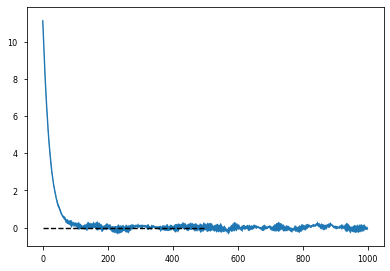

In [427]:
dataplus.load("OtOttp","dsigma", direc=processedDataDir)
dataplus.load("OtOttpFourier","dsigma", direc=processedDataDir)
dataplus.load("OtOttp_blocks","dsigma", direc=processedDataDir)

#dataminus.computeOtOtpBlocked("A", momNum = 0, tMax = 5000.0, blockSizeT = 200000.0,  errFunc = lambda x : jackknife(x,50), parallel=True)
plotter.plot(dataplus,"OtOttp","dsigma")
plt.plot([0,500],[0,0],'--k')
#plt.xlim(0,500)
#plt.yscale('log')

In [428]:
dataplus.computeStatisticalCor('dsigma', omMax=0.5, errFunc=lambda x: (np.mean(x,axis=0), np.std(x,axis=0)),  myTmax=10000.0, filterFunc=lambda x : np.exp(-x**2 / 200.0**2))


True


/Users/adrien/miniconda3/lib/python3.9/site-packages/scipy/interpolate/fitpack2.py:665: ComplexWarning: Casting complex values to real discards the imaginary part
  self._data = dfitpack.fpcurf0(x, y, k, w=w, xb=bbox[0],


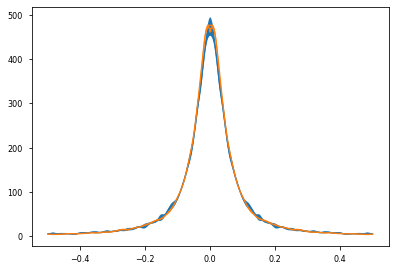

In [411]:
plotter.plot(dataplus,"OtOttpFourier","dsigma", yfact = 1)
plotter.plot(dataplus,"OtOttpFourier","phi", yfact = 1)
#plt.yscale('log')

In [19]:
dataplus.load("propagator", "A", direc=processedDataDir)
dataplus.load("propagator", "V", direc=processedDataDir)

(4.9, 5.1)

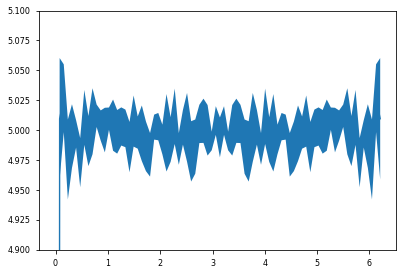

In [40]:
plotter.plot(dataplus,"propagator", "V", yfact=80**3)
plt.ylim([4.90,5.1])

/Users/adrien/miniconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/adrien/miniconda3/lib/python3.9/site-packages/numpy/ma/core.py:3375: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval


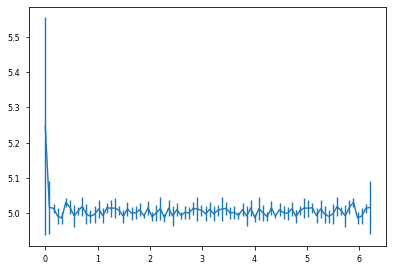

In [42]:
plotter.plot(dataplus,"propagator", "A", yfact=80**3, band = False)

In [429]:
dataplus.save("OtOttp","A", fmt="gnuplot")
dataplus.save("OtOttp","phi", fmt="gnuplot")
dataplus.save("OtOttp","dsigma", fmt="gnuplot")
dataplus.save("OtOttpFourier","phi", fmt="gnuplot")
dataplus.save("OtOttpFourier","dsigma", fmt="gnuplot")

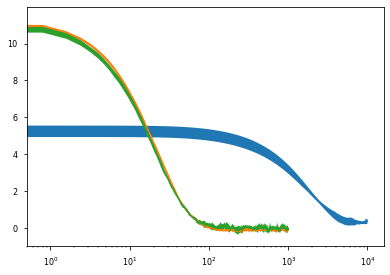

In [406]:
plotter.plot(dataplus,"OtOttp","A")
plotter.plot(dataplus,"OtOttp","phi")
plotter.plot(dataplus,"OtOttp","dsigma")
plt.xscale('log')

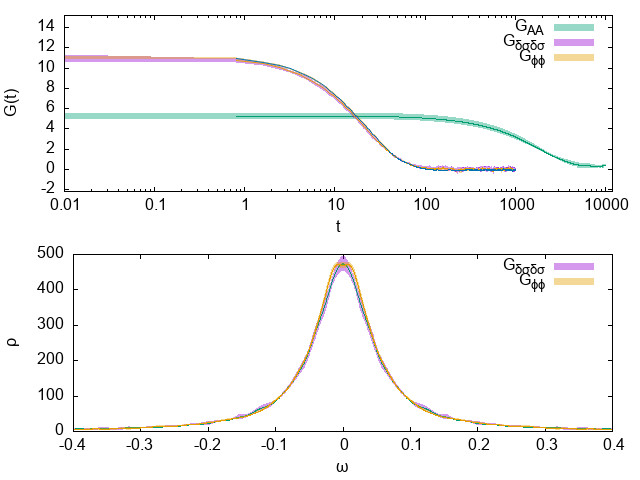

plot gdir.'zplus_N080_m-0445648_h003684_c00500_OtOttp_A.txt'  using 1:($2+$4):($2-$4)  with filledcurves title 'G_{AA}' lt 2,          '' with lines notitle,       gdir.'zplus_N080_m-0445648_h003684_c00500_OtOttp_dsigma.txt'  using 1:($2+$4):($2-$4)  with filledcurves title 'G_{δσδσ}' lt 1,          '' with lines notitle,        gdir.'zplus_N080_m-0445648_h003684_c00500_OtOttp_phi.txt'  using 1:($2+$4):($2-$4)  with filledcurves title 'G_{ϕϕ}' lt 4,          '' with lines notitle  
multiplot> 
multiplot> 

In [459]:
%%gnuplot


set style fill transparent solid 0.4 noborder

set multiplot layout 2,1


#rescaled G(t)

set xrange[0.01:12000]
set yrange [-2.2:15.2]
set xlabel 't'
set ylabel 'G(t)'
set logscale x

plot gdir.'zplus_N080_m-0445648_h003684_c00500_OtOttp_A.txt'  using 1:($2+$4):($2-$4)  with filledcurves title 'G_{AA}' lt 2, \
        '' with lines notitle, \
     gdir.'zplus_N080_m-0445648_h003684_c00500_OtOttp_dsigma.txt'  using 1:($2+$4):($2-$4)  with filledcurves title 'G_{δσδσ}' lt 1, \
        '' with lines notitle,  \
     gdir.'zplus_N080_m-0445648_h003684_c00500_OtOttp_phi.txt'  using 1:($2+$4):($2-$4)  with filledcurves title 'G_{ϕϕ}' lt 4, \
        '' with lines notitle  
#rescaled \rho  

unset logscale x
set ylabel 'ρ'
set xlabel 'ω'
set xrange[-0.4:0.4]
set yrange [0:500]

plot gdir.'zplus_N080_m-0445648_h003684_c00500_OtOttpFourier_dsigma.txt'  using 1:($2+$4):($2-$4)  with filledcurves title 'G_{δσδσ}' lt 1, \
        '' with lines notitle, \
     gdir.'zplus_N080_m-0445648_h003684_c00500_OtOttpFourier_phi.txt'  using 1:($2+$4):($2-$4)  with filledcurves title 'G_{ϕϕ}' lt 4, \
        '' with lines notitle
    
unset multiplot
set out

## Critical line

In [57]:
nuc = 0.402432
z = 1.468 #mean
z=1.468
#z = 1.455#1.50 #mean -sigma, best by eye.
-nuc * z

def rescaling(h, href):
    return (h/href)**(-nuc * z)

In [105]:
data=dict()
data["h0002"] = ConfResults(fn="../data/zcritical_N080_m-0481100_h002000_c00500.h5",thTime=1000,dt=0.8, data_format="new", processedDir=processedDataDir, plotDir=gdir)
data["h0004"] = ConfResults(fn="../data/zcritical_N080_m-0481100_h004000_c00500.h5",thTime=1000,dt=0.8, data_format="new", processedDir=processedDataDir, plotDir=gdir)
data["h0006"] = ConfResults(fn="../data/zcritical_N080_m-0481100_h006000_c00500.h5",thTime=1000,dt=0.8, data_format="new", processedDir=processedDataDir, plotDir=gdir)
data["h001"] = ConfResults(fn="../data/zcritical_N080_m-0481100_h010000_c00500.h5",thTime=1000,dt=0.8, data_format="new", processedDir=processedDataDir, plotDir=gdir)

hkeys = ["h0002", "h0004", "h0006", "h001"]

hs = dict()
hs["h0002"] = 0.002
hs["h0004"] = 0.004
hs["h0006"] = 0.006
hs["h001"] = 0.01

massCutoffs = dict()
massCutoffs["h0002"] = 3000.0
massCutoffs["h0004"] = 2000.0
massCutoffs["h0006"] = 1300.0
massCutoffs["h001"] = 900.0 # set a posteriori to improve the fourier transform.

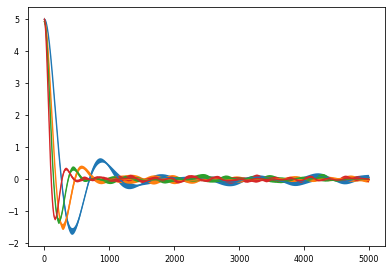

In [228]:
for h in hkeys[:]:
    data[h].load("OtOttp","A")
    #data[h].load("OtOttpFourier","A", direc=processedDataDir)
    data[h].load("OtOttp_blocks","A")

    #data[h].computeOtOtpBlocked("A", momNum = 0, tMax = 5000.0, blockSizeT = 20000.0,  errFunc = lambda x : (np.mean(x,axis=0), np.std(x,axis=0)), parallel=True)
    plotter.plot(data[h],"OtOttp","A")
    #plt.yscale('log')
plt.show()

In [41]:
data["h0002"].loadAv('phi0')

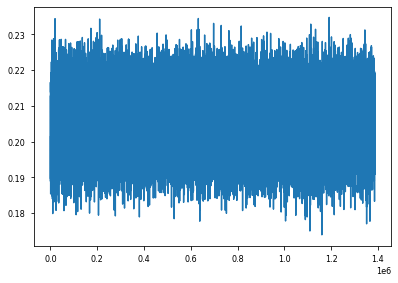

In [42]:
plt.plot(data["h0002"].av['phi0'])

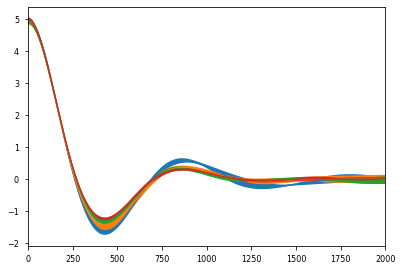

In [175]:
for k in hkeys[:]:
    plotter.plot(data[k],"OtOttp","A", xfact= 1.0 / rescaling(hs[k],0.002))
    data[k].save("OtOttp","A", fmt = "gnuplot", tag = "_rescaled", xfact = 1.0 / rescaling(hs[k],0.002) )
    data[k].save("OtOttp","A", fmt = "gnuplot")
plt.xlim([0,2000])

plt.show()

True


/Users/adrien/miniconda3/lib/python3.9/site-packages/scipy/interpolate/fitpack2.py:665: ComplexWarning: Casting complex values to real discards the imaginary part
  self._data = dfitpack.fpcurf0(x, y, k, w=w, xb=bbox[0],


True


/Users/adrien/miniconda3/lib/python3.9/site-packages/scipy/interpolate/fitpack2.py:665: ComplexWarning: Casting complex values to real discards the imaginary part
  self._data = dfitpack.fpcurf0(x, y, k, w=w, xb=bbox[0],


True


/Users/adrien/miniconda3/lib/python3.9/site-packages/scipy/interpolate/fitpack2.py:665: ComplexWarning: Casting complex values to real discards the imaginary part
  self._data = dfitpack.fpcurf0(x, y, k, w=w, xb=bbox[0],


True


/Users/adrien/miniconda3/lib/python3.9/site-packages/scipy/interpolate/fitpack2.py:665: ComplexWarning: Casting complex values to real discards the imaginary part
  self._data = dfitpack.fpcurf0(x, y, k, w=w, xb=bbox[0],


(0.0, 0.03)

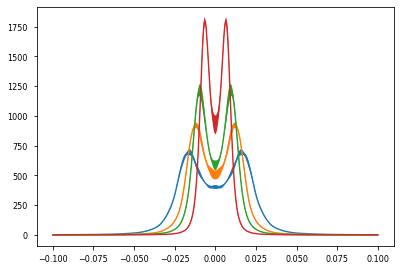

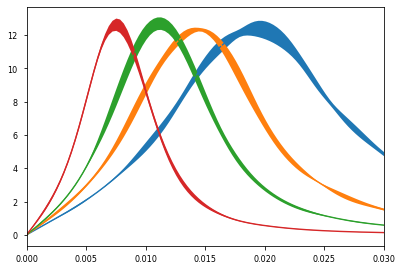

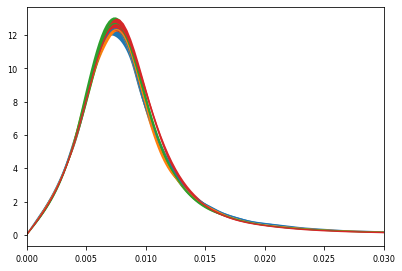

In [390]:
plt.figure(1)
for k in hkeys[::-1][:]:
    data[k].computeStatisticalCor('A', omMax=0.1, errFunc=lambda x: (np.mean(x,axis=0), np.std(x,axis=0)), filterFunc=lambda x : np.exp(-x**2 / massCutoffs[h]**2), myTmax = 20000.0)
    plotter.plot(data[k],"OtOttpFourier","A")
plt.figure(2)

for k in hkeys[::-1][:]:
    plotter.plot(data[k],"OtOttpFourier","A", yfact = np.abs(data[k].OtOttpFourier_oms["A"]))
    data[k].save("OtOttpFourier","A", fmt = "gnuplot")
    data[k].save("OtOttpFourier","A", yfact = np.abs(data[k].OtOttpFourier_oms["A"]), fmt = "gnuplot", tag = "_spectral")
   # plt.errorbar(data[k].OtOttpFourier_oms["A"], np.abs(data[k].OtOttpFourier_oms["A"]) * data[k].OtOttpFourier["A"].mean, np.abs(data[k].OtOttpFourier_oms["A"]) * data[k].OtOttpFourier["A"].err)
plt.xlim([0,0.03])


plt.figure(3)
for k in hkeys[::-1][:]:
    plotter.plot(data[k],"OtOttpFourier","A", xfact = rescaling(hs[k], 0.002) , yfact = np.abs(data[k].OtOttpFourier_oms["A"]))
    data[k].save("OtOttpFourier","A", xfact = rescaling(hs[k], 0.002) , yfact = np.abs(data[k].OtOttpFourier_oms["A"]), fmt = "gnuplot", tag = "_spectral_rescaled")

plt.xlim([0,0.03])

In [215]:
cr_vals

array([-1.20093638e+00,  4.57547579e-01,  4.57447284e-01,  4.57465887e-01,
       -1.14157606e-01, -1.14078105e-01, -1.14081599e-01,  8.20289580e-03,
        8.21449751e-03,  8.33576111e-03,  8.33342852e-03,  1.35012936e-02,
        1.32336828e-02,  1.32793828e-02,  1.32356853e-02,  1.32645418e-02,
       -1.21129030e-03, -1.10408621e-03, -3.28281819e-02, -3.28159148e-02,
       -7.61116255e-02, -7.60122873e-02, -7.60387275e-02, -7.59496208e-02,
       -7.60037900e-02, -7.59629054e-02, -7.63284288e-02, -7.63058703e-02])

In [222]:
def getRescalingFromMinimum(x, data1, data2):
    min1 = findMin(x,data1)#x[np.argmin(data1)]
    min2 = findMin(x,data2)#x[np.argmin(data2)]
    return min2 / min1

In [223]:
%%time
resc = []
hr = []

mMax = 1200
for j in range(0,3):
    for h in hkeys[j+1:]:
        test = []
        for i in range(len(data[hkeys[j]].OtOttp_blocks["A"])):
            for kk in range(len(data[h].OtOttp_blocks["A"])):
                print ("j={}, h={}. i={}, k={}".format(j,h,i,kk), end="\r")
                test.append(getRescalingFromMinimum(data[hkeys[j]].OtOttp_time["A"][:mMax], data[hkeys[j]].OtOttp_blocks["A"][kk][:mMax], data[h].OtOttp_blocks["A"][i][:mMax]))
        resc.append((np.mean(test, axis = 0),np.std(test, axis = 0)))
        #resc.append(bootstrap(test, 100))
        hr.append(hs[hkeys[j]]/ hs[h])
        
stop = None
htofit = np.asarray(hr)[:stop]
rescMean =np.asarray(resc)[:stop,0].flatten()
rescErr = np.asarray(resc)[:stop,1].flatten()
hr, resc = zip(*sorted(zip(hr, resc)))

CPU times: user 35.9 s, sys: 1.41 s, total: 37.3 s
Wall time: 36.2 s


In [234]:
model = lambda par : htofit**par[0]
chi2 = lambda par : np.sum(np.square((rescMean - model(par)) / rescErr ))
fit = Minuit(chi2, [0.6], name=["b"])

fit.errordef = Minuit.LEAST_SQUARES

#fit.limits = []

fit.migrad()
fit.minos()

┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = 0.2411                     │              Nfcn = 18               │
│ EDM = 1.22e-07 (Goal: 0.0002)    │                                      │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │        No Parameters at limit        │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ b    │   0.592   │   0.005   │   -0.005   │   0.005    │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┐
│          │           b           │
├──────────┼───────────┬───────────┤
│  Error   │  -0.005   │   0.005   │
│  Valid   │   True    │   True    │
│ At Limit │   False   │   False   │
│ Max FCN  │   False   │   False   │
│ New Min  │   False   │   False   │
└──────────┴───────────┴───────────┘
┌───┬──────────┐
│   │        b │
├───┼──────────┤
│ b │ 2.87e-05 │
└───┴──────────┘

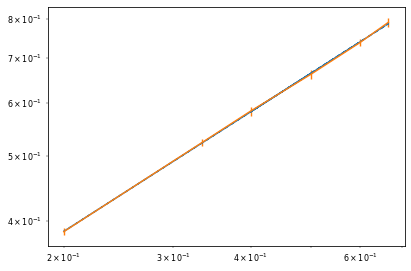

In [235]:
plt.plot(htofit, model(fit.values),'--')
plt.errorbar(np.asarray(hr)[:stop], np.asarray(resc)[:stop,0], np.asarray(resc)[:stop,1].flatten())
plt.xscale('log')
plt.yscale('log')


In [226]:
print("z = {} +- {}".format(fit.values[0] / nuc, fit.errors[0] / nuc))

z = 1.4713299728678464 +- 0.013320546909182206


In [231]:
%%time
rescF = []
hrF = []

for j in range(0,3):
    for h in hkeys[j+1:]:
        test = []
        for i in range(len(data[hkeys[j]].OtOttpFourier_omspeak_blocks["A"])):
            for kk in range(len(data[h].OtOttpFourier_omspeak_blocks["A"])):
                print ("j={}, h={}. i={}, k={}".format(j,h,i,kk), end="\r")
                test.append(data[hkeys[j]].OtOttpFourier_omspeak_blocks["A"][kk] / data[h].OtOttpFourier_omspeak_blocks["A"][i])
        rescF.append((np.mean(test, axis = 0),np.std(test, axis = 0)))
        #rescF.append(bootstrap(test,100))
        hrF.append(hs[hkeys[j]]/ hs[h])
        
stopF = None
htofitF = np.asarray(hrF)[:stopF]
rescMeanF =np.asarray(rescF)[:stopF,0].flatten()
rescErrF = np.asarray(rescF)[:stopF,1].flatten()
hrF, rescF = zip(*sorted(zip(hrF, rescF)))

CPU times: user 3.23 ms, sys: 1.78 ms, total: 5 ms
Wall time: 3.68 ms


In [232]:
modelF = lambda par : htofitF**par[0]
chi2F = lambda par : np.sum(np.square((rescMeanF - modelF(par)) / rescErrF ))
fitF = Minuit(chi2F, [0.6], name=["b"])

fitF.errordef = Minuit.LEAST_SQUARES

#fit.limits = []

fitF.migrad()
fitF.minos()

┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = 0.3901                     │              Nfcn = 20               │
│ EDM = 2.59e-06 (Goal: 0.0002)    │                                      │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │        No Parameters at limit        │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ b    │   0.577   │   0.027   │   -0.026   │   0.027    │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┐
│          │           b           │
├──────────┼───────────┬───────────┤
│  Error   │  -0.026   │   0.027   │
│  Valid   │   True    │   True    │
│ At Limit │   False   │   False   │
│ Max FCN  │   False   │   False   │
│ New Min  │   False   │   False   │
└──────────┴───────────┴───────────┘
┌───┬──────────┐
│   │        b │
├───┼──────────┤
│ b │ 0.000716 │
└───┴──────────┘

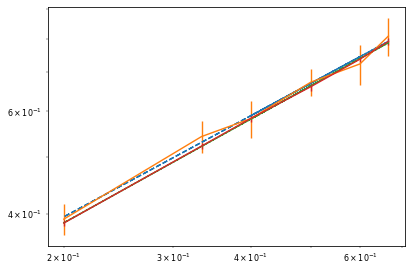

In [233]:
plt.plot(htofitF, modelF(fitF.values),'--')
plt.errorbar(np.asarray(hrF)[:stopF], np.asarray(rescF)[:stopF,0], np.asarray(rescF)[:stopF,1].flatten())

plt.plot(htofit, model(fit.values),'--')
plt.errorbar(np.asarray(hr)[:stop], np.asarray(resc)[:stop,0], np.asarray(resc)[:stop,1].flatten())
plt.xscale('log')
plt.yscale('log')


In [236]:
hh = []
hh.append(htofit)
hh.append(htofitF)
rrM = []
rrM.append(rescMean)
rrM.append(rescMeanF)
rrE = []
rrE.append(rescErr)
rrE.append(rescErrF)

mm = lambda par : hh**par[0]
cc = lambda par : np.sum(np.square((rrM - mm(par)) / rrE ))
ff = Minuit(cc, [0.6], name=["b"])

ff.errordef = Minuit.LEAST_SQUARES

#fit.limits = []

ff.migrad()
ff.minos()

┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = 0.9182                     │              Nfcn = 18               │
│ EDM = 1.9e-07 (Goal: 0.0002)     │                                      │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │        No Parameters at limit        │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ b    │   0.592   │   0.005   │   -0.005   │   0.005    │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┐
│          │           b           │
├──────────┼───────────┬───────────┤
│  Error   │  -0.005   │   0.005   │
│  Valid   │   True    │   True    │
│ At Limit │   False   │   False   │
│ Max FCN  │   False   │   False   │
│ New Min  │   False   │   False   │
└──────────┴───────────┴───────────┘
┌───┬──────────┐
│   │        b │
├───┼──────────┤
│ b │ 2.76e-05 │
└───┴──────────┘

In [238]:
np.savetxt(gdir + "rescaling_from_min.txt", np.column_stack([
                htofit,
                rescMean,
                rescErr
            ]))

In [237]:
print("z = {} +- {}".format(ff.values[0] / nuc, ff.errors[0] / nuc))

z = 1.4699542681161935 +- 0.013060626040906513


In [378]:
#%gnuplot  cairolatex standalone size 6.3,4.2 font "Helvetica,12" 
%gnuplot  pdfcairo lw 0.5 size 6.3,4.2 font "Helvetica,14" 

In [371]:
#!pdflatex testc.tex

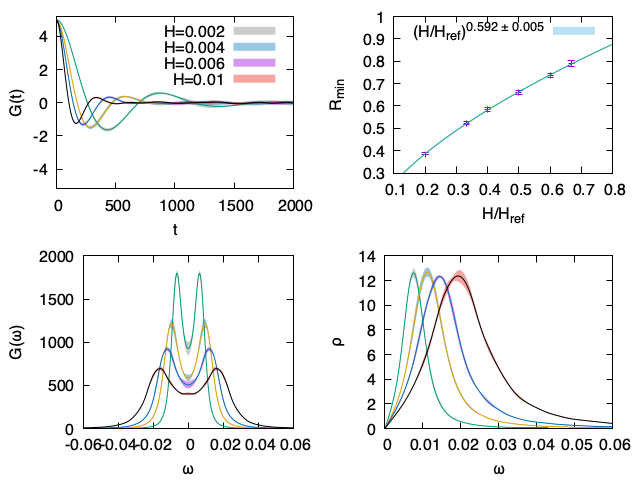


[?
[?
[?
[?
[?
[?
[?
[?
[?
[?
[?
[?
[?
multiplot> 
multiplot> 
multiplot> 
multiplot> 
[?
[?
[?
[?
[?
[?
[?
[?
[?
[?
[?
[?
[?
[?
[?
[?
[?
[?
[?
[?
[?
[?
[?
[?
[?
[?
[?
[?
[?
[?
[?
[?
[?
[?

In [391]:
%%gnuplot
#set out "testc.pdf"

set style fill transparent solid 0.4 noborder

set multiplot layout 2,2


set xrange[0:2000]
set yrange [-5.2:5.2]
set xlabel 't'
set ylabel 'G(t)'

plot gdir.'zcritical_N080_m-0481100_h002000_c00500_OtOttp_A.txt'  using 1:($2+$4):($2-$4)  with filledcurves title 'H=0.002' lt 9, \
        '' with lines notitle, \
     gdir.'zcritical_N080_m-0481100_h004000_c00500_OtOttp_A.txt'  using 1:($2+$4):($2-$4)  with filledcurves title 'H=0.004' lt 6, \
        '' with lines notitle,  \
     gdir.'zcritical_N080_m-0481100_h006000_c00500_OtOttp_A.txt'  using 1:($2+$4):($2-$4)  with filledcurves title 'H=0.006' lt 1, \
        '' with lines notitle,  \
     gdir.'zcritical_N080_m-0481100_h010000_c00500_OtOttp_A.txt'  using 1:($2+$4):($2-$4)  with filledcurves title 'H=0.01', \
        '' with lines notitle 
     
set xlabel 'H/H_{ref}'
set ylabel 'R_{min}'
set xrange[0.1:0.8]
set yrange [0.3:1]
f(x)=x**0.597
g(x)=x**0.587


plot gdir.'rescaling_from_min.txt' using 1:2:3 with yerrorbars title '', \
        x**0.592 title '', \
        '+' using 1:(g($1)):(f($1)) with filledcurves title "(H/H_{ref})^{0.592 {/Symbol \261} 0.005}"
        
        

    
set xlabel 'ω'
set ylabel 'G(ω)'


set xrange[-0.06:0.06]
set yrange [0:2000]

plot gdir.'zcritical_N080_m-0481100_h002000_c00500_OtOttpFourier_A.txt'  using 1:($2+$4):($2-$4)  with filledcurves title '' lt 9, \
        '' with lines notitle, \
     gdir.'zcritical_N080_m-0481100_h004000_c00500_OtOttpFourier_A.txt'  using 1:($2+$4):($2-$4)  with filledcurves title '' lt 6, \
        '' with lines notitle,  \
     gdir.'zcritical_N080_m-0481100_h006000_c00500_OtOttpFourier_A.txt'  using 1:($2+$4):($2-$4)  with filledcurves title '' lt 1, \
        '' with lines notitle,  \
     gdir.'zcritical_N080_m-0481100_h010000_c00500_OtOttpFourier_A.txt'  using 1:($2+$4):($2-$4)  with filledcurves title '', \
        '' with lines notitle     
    
#set xlabel 't (H_{ref} / H)^{ν_c z}'
set ylabel 'ρ'
set xrange[0:0.06]
set yrange [0:14]

plot gdir.'zcritical_N080_m-0481100_h002000_c00500_OtOttpFourier_A_spectral.txt'  using 1:($2+$4):($2-$4)  with filledcurves title '' lt 9, \
        '' with lines notitle, \
     gdir.'zcritical_N080_m-0481100_h004000_c00500_OtOttpFourier_A_spectral.txt'  using 1:($2+$4):($2-$4)  with filledcurves title '' lt 6, \
        '' with lines notitle,  \
     gdir.'zcritical_N080_m-0481100_h006000_c00500_OtOttpFourier_A_spectral.txt'  using 1:($2+$4):($2-$4)  with filledcurves title '' lt 1, \
        '' with lines notitle,  \
     gdir.'zcritical_N080_m-0481100_h010000_c00500_OtOttpFourier_A_spectral.txt'  using 1:($2+$4):($2-$4)  with filledcurves title '', \
        '' with lines notitle 
       
unset multiplot
set out

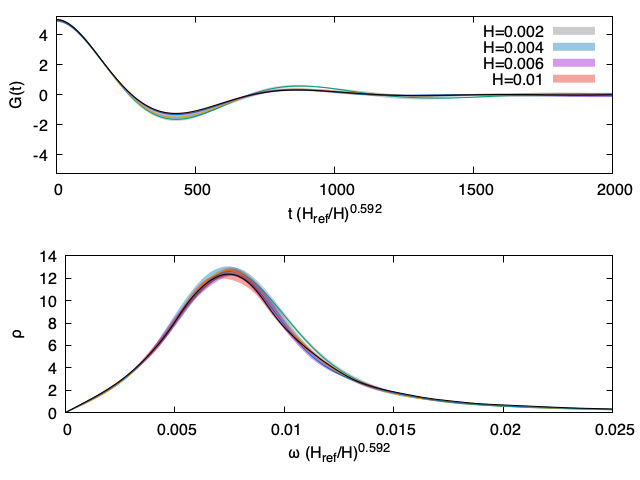


[?
[?
[?
[?
[?
[?
[?
[?
[?
[?
[?
[?
[?
multiplot> 
multiplot> 
multiplot> 
multiplot> 
[?
[?
[?
[?
[?
[?
[?
[?
[?
[?
[?
[?

In [397]:
%%gnuplot
#set out "testc.pdf"

set style fill transparent solid 0.4 noborder

set multiplot layout 2,1


set xrange[0:2000]
set yrange [-5.2:5.2]
set xlabel 't (H_{ref}/H)^{0.592}'
set ylabel 'G(t)'

plot gdir.'zcritical_N080_m-0481100_h002000_c00500_OtOttp_A_rescaled.txt'  using 1:($2+$4):($2-$4)  with filledcurves title 'H=0.002' lt 9, \
        '' with lines notitle, \
     gdir.'zcritical_N080_m-0481100_h004000_c00500_OtOttp_A_rescaled.txt'  using 1:($2+$4):($2-$4)  with filledcurves title 'H=0.004' lt 6, \
        '' with lines notitle,  \
     gdir.'zcritical_N080_m-0481100_h006000_c00500_OtOttp_A_rescaled.txt'  using 1:($2+$4):($2-$4)  with filledcurves title 'H=0.006' lt 1, \
        '' with lines notitle,  \
     gdir.'zcritical_N080_m-0481100_h010000_c00500_OtOttp_A_rescaled.txt'  using 1:($2+$4):($2-$4)  with filledcurves title 'H=0.01', \
        '' with lines notitle 
     
set ylabel 'ρ'
set xlabel 'ω (H_{ref}/H)^{0.592}'
set xrange[0:0.025]
set yrange [0:14]

plot gdir.'zcritical_N080_m-0481100_h002000_c00500_OtOttpFourier_A_spectral_rescaled.txt'  using 1:($2+$4):($2-$4)  with filledcurves title '' lt 9, \
        '' with lines notitle, \
     gdir.'zcritical_N080_m-0481100_h004000_c00500_OtOttpFourier_A_spectral_rescaled.txt'  using 1:($2+$4):($2-$4)  with filledcurves title '' lt 6, \
        '' with lines notitle,  \
     gdir.'zcritical_N080_m-0481100_h006000_c00500_OtOttpFourier_A_spectral_rescaled.txt'  using 1:($2+$4):($2-$4)  with filledcurves title '' lt 1, \
        '' with lines notitle,  \
     gdir.'zcritical_N080_m-0481100_h010000_c00500_OtOttpFourier_A_spectral_rescaled.txt'  using 1:($2+$4):($2-$4)  with filledcurves title '', \
        '' with lines notitle     
    
unset multiplot
set out

[0.014, 7.0, 0.01]
[0.014, 7.0, 0.01]
[0.014, 7.0, 0.01]
[0.014, 7.0, 0.01]


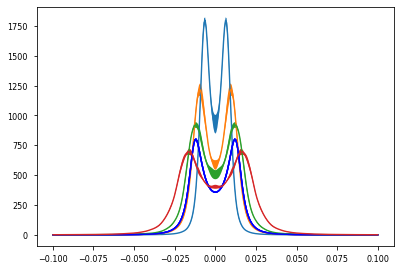

In [18]:
fitCor=dict()

for k in hkeys:
    fitCor[k] = Fitter(data[k])
    
for h in hkeys:
    fitCor[h].setParValues("OtOttpFourier", "A", [0.014,7.0,0.01])
    fitCor[h].plot("OtOttpFourier","A")
    plotter.plot(data[h],"OtOttpFourier","A")

[0.00792371311261908, 9.562553362339306, 0.005437290575446729]
[0.011928126777598358, 9.837847185395338, 0.008675325885260543]
[0.015351078253077466, 9.547309987587335, 0.012064783639494037]
[0.020935563952107383, 9.95860700687324, 0.017108708015799667]


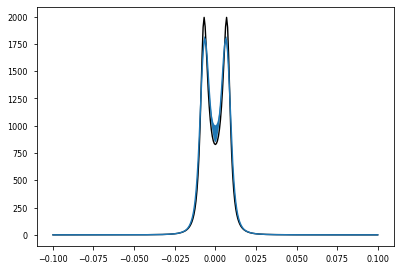

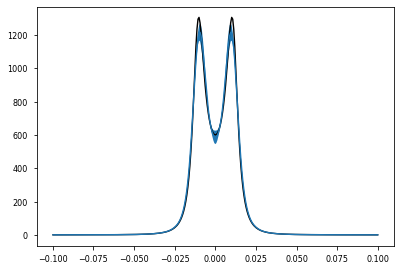

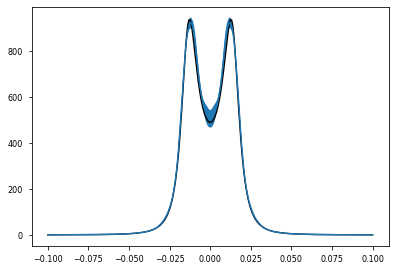

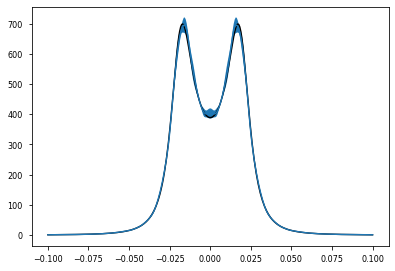

In [19]:
c=0
for h in hkeys:
    plt.figure(c)
    fitCor[h].fit("OtOttpFourier", "A")
    fitCor[h].plot("OtOttpFourier","A", color="k")
    plotter.plot(data[h],"OtOttpFourier","A")
    c+=1

In [20]:
for h in hkeys:
    print("chi2 per dof: {}".format(fitCor[h].averagechi2reduce))

chi2 per dof: {'OtOttpFourier': {'A': 3.5524764759533625}}
chi2 per dof: {'OtOttpFourier': {'A': 1.9493467936471767}}
chi2 per dof: {'OtOttpFourier': {'A': 1.0830753543819094}}
chi2 per dof: {'OtOttpFourier': {'A': 0.6202217452237655}}


In [21]:
mpsMean = []
mpsErr = []
hss = []
for h in hkeys:
    mpsMean.append(fitCor[h].par['OtOttpFourier']['A'][0])    
    mpsErr.append(fitCor[h].parErr['OtOttpFourier']['A'][0] * fitCor[h].averagechi2reduce['OtOttpFourier']['A'])
    hss.append(hs[h])
mpsMean = np.asarray(mpsMean)
mpsErr = np.asarray(mpsErr)
hss = np.asarray(hss)


model = lambda par : par[0]*hss**par[1]
chi2 = lambda par : np.sum(np.square((mpsMean - model(par)) / mpsErr ))
fitMp = Minuit(chi2, [2.0,0.6], name=["a","b"])

fitMp.errordef = Minuit.LEAST_SQUARES

#fit.limits = []

fitMp.migrad()
fitMp.minos()

┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = 7.43                       │              Nfcn = 154              │
│ EDM = 5.88e-07 (Goal: 0.0002)    │                                      │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │        No Parameters at limit        │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │  0.3464   │  0.0027   │  -0.0027   │   0.0028   │         │         │       │
│ 1 │ b    │  0.6094   │  0.0017   │  -0.0017   │   0.0017   │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┐
│          │           a           │           b           │
├──────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │  -0.0027  │  0.0028   │  -0.0017  │  0.0017   │
│  Valid   │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┘
┌───┬───────────────────┐
│   │        a        b │
├───┼───────────────────┤
│ a │ 7.54e-06 4.63e-06 │
│ b │ 4.63e-06 2.85e-06 │
└───┴───────────────────┘

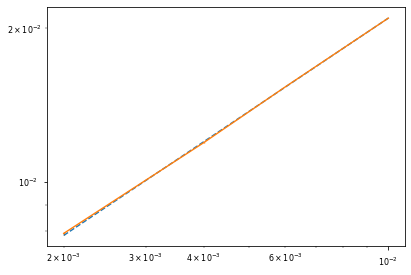

In [22]:
plt.plot(hss, model(fitMp.values),'--')
plt.errorbar(hss, mpsMean, mpsErr)
plt.xscale('log')
plt.yscale('log')

In [23]:
print("z = {} +- {}".format(fitMp.values[1] / nuc, fitMp.errors[1] / nuc))

z = 1.5141848729895278 +- 0.004191472681544171


<ErrorbarContainer object of 3 artists>

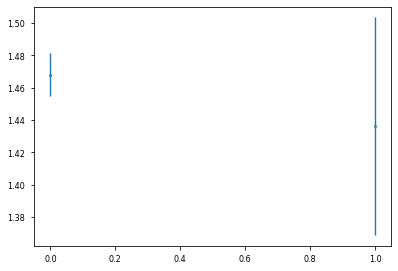

In [139]:
plt.errorbar([0,1],[fit.values[0] / nuc,   fitF.values[0] / nuc ], [fit.errors[0] / nuc, fitF.errors[0] / nuc], fmt='.')

# Pseudocritical point

In [37]:
datazps = ConfResults(fn="../data/zpseudocritical_N080_m-0470052_h003000_c00500.h5",thTime=1000,dt=0.8, data_format="new")


(0.0, 2200.0)

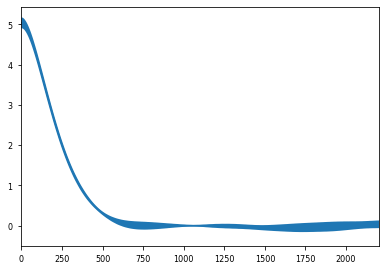

In [39]:
datazps.load("OtOttp","A", direc=processedDataDir)
datazps.load("OtOttpFourier","A", direc=processedDataDir)
datazps.load("OtOttp_blocks","A", direc=processedDataDir)

#datazps.computeOtOtpBlocked("A", momNum = 0, tMax = 5000.0, blockSizeT = 20000.0,  errFunc = lambda x : (np.mean(x,axis=0), np.std(x,axis=0)), parallel=True)

plotter.plot(datazps,"OtOttp","A")
#plt.ylim(-0.1,0.2)
plt.xlim(0.,2200)

In [65]:
datazps.computeStatisticalCor('A', omMax=0.1, errFunc=lambda x: (np.mean(x,axis=0), np.std(x,axis=0)), filterFunc=lambda x : np.exp(-x**2 / 2500.0**2),myTmax = 20000)


True


(-0.03, 0.03)

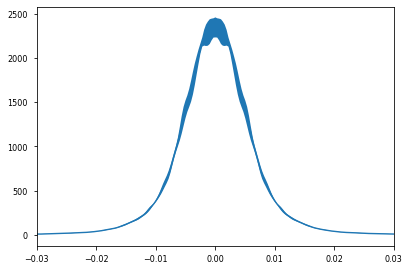

In [66]:
plotter.plot(datazps,"OtOttpFourier","A")
plt.xlim((-0.03,0.03))

In [44]:
dataz1p214 = ConfResults(fn="../data/z1p214_N080_m-0471156_h003000_c00500.h5",thTime=1000,dt=0.8, data_format="new")
dataz1p214.load("OtOttp","A", direc=processedDataDir)
dataz1p214.load("OtOttp_blocks","A", direc=processedDataDir)

#dataz1p214.computeOtOtpBlocked("A", momNum = 0, tMax = 5000.0, blockSizeT = 20000.0,  errFunc = lambda x : (np.mean(x,axis=0), np.std(x,axis=0)), parallel=True)


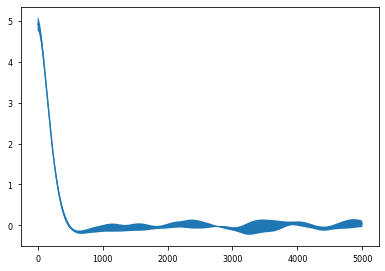

In [45]:
#dataz1p214.load("OtOttp","A", direc=processedDataDir)
#dataz1p214.load("OtOttpFourier","A", direc=processedDataDir)
plotter.plot(dataz1p214,"OtOttp","A")

True


(-0.01, 0.01)

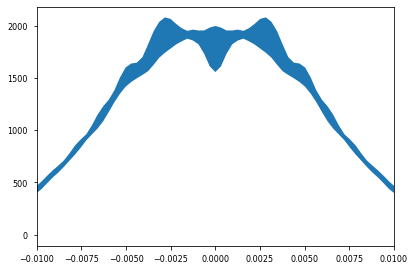

In [63]:
dataz1p214.computeStatisticalCor('A', omMax=0.1, errFunc=lambda x: (np.mean(x,axis=0), np.std(x,axis=0)), filterFunc=lambda x : np.exp(-x**2 / 3000.0**2), myTmax = 20000)

plotter.plot(dataz1p214,"OtOttpFourier","A")
#plt.xscale('log')
plt.xlim([-0.01,0.01])

In [84]:
dataz1p079= ConfResults(fn="../data/z1p079_N080_m-0472261_h003000_c00500.h5",thTime=1000,dt=0.8, data_format="new")
dataz1p079.load("OtOttp","A", direc=processedDataDir)
dataz1p079.load("OtOttp_blocks","A", direc=processedDataDir)

#dataz1p079.computeOtOtpBlocked("A", momNum = 0, tMax = 5000.0, blockSizeT = 20000.0,  errFunc = lambda x : (np.mean(x,axis=0), np.std(x,axis=0)), parallel=True)


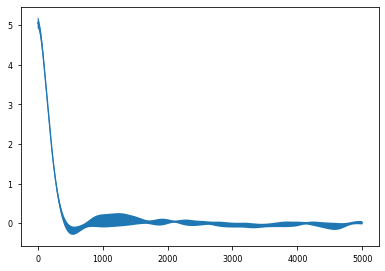

In [85]:
plotter.plot(dataz1p079,"OtOttp","A")

In [86]:
dataz1p079.computeStatisticalCor('A', omMax=0.1, errFunc=lambda x: (np.mean(x,axis=0), np.std(x,axis=0)), filterFunc=lambda x : np.exp(-x**2 / 2000.0**2),myTmax = 20000)


True


(-0.01, 0.01)

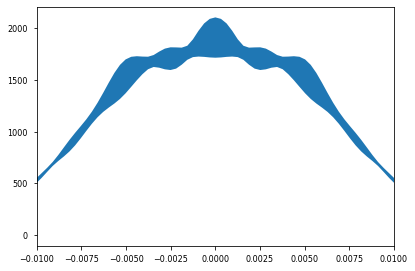

In [61]:
plotter.plot(dataz1p079,"OtOttpFourier","A")
#plt.xscale('log')
plt.xlim([-0.01,0.01])

In [52]:
dataz1p2815 = ConfResults(fn="../data/z1p2815_N080_m-0470604_h003000_c00500.h5",thTime=1000,dt=0.8, data_format="new")


In [53]:
dataz1p2815.load("OtOttp","A", direc=processedDataDir)
dataz1p2815.load("OtOttpFourier","A", direc=processedDataDir)
dataz1p2815.load("OtOttp_blocks","A", direc=processedDataDir)

#dataz1p2815.computeOtOtpBlocked("A", momNum = 0, tMax = 5000.0, blockSizeT = 20000.0,  errFunc = lambda x : (np.mean(x,axis=0), np.std(x,axis=0)), parallel=True)


(0.0, 2000.0)

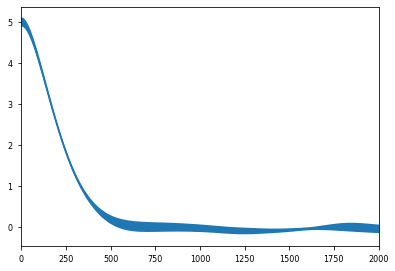

In [54]:

plotter.plot(dataz1p2815,"OtOttp","A")
#plt.ylim(-0.1,0.2)
plt.xlim(0.,2000)

In [55]:
dataz1p2815.computeStatisticalCor('A', omMax=0.1, errFunc=lambda x: (np.mean(x,axis=0), np.std(x,axis=0)), filterFunc=lambda x : np.exp(-x**2 / 4000.0**2),myTmax = 10000)


True


In [293]:
dataz0p944= ConfResults(fn="../data/z0p944_N080_m-0473366_h003000_c00500.h5",thTime=1000,dt=0.8, data_format="new")
dataz0p944.load("OtOttp","A", direc=processedDataDir)
dataz0p944.load("OtOttp_blocks","A", direc=processedDataDir)

#dataz0p944.computeOtOtpBlocked("A", momNum = 0, tMax = 5000.0, blockSizeT = 20000.0,  errFunc = lambda x : (np.mean(x,axis=0), np.std(x,axis=0)), parallel=True)


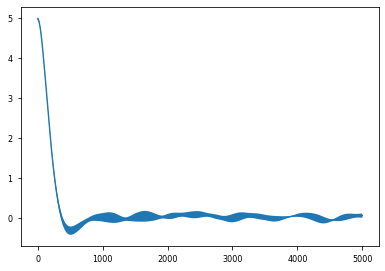

In [294]:
plotter.plot(dataz0p944,"OtOttp","A")


In [295]:
dataz0p944.computeStatisticalCor('A', omMax=0.1, errFunc=lambda x: (np.mean(x,axis=0), np.std(x,axis=0)), filterFunc=lambda x : np.exp(-x**2 / 1800.0**2),myTmax = 20000)


True


(-0.03, 0.03)

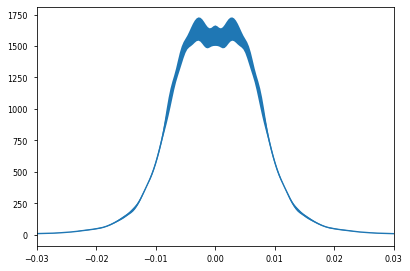

In [93]:
plotter.plot(dataz0p944,"OtOttpFourier","A")
plt.xlim([-0.03,0.03])

(-0.03, 0.03)

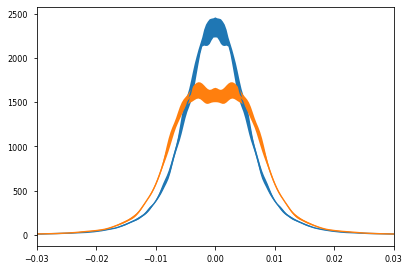

In [317]:

#plotter.plot(dataz1p2815,"OtOttpFourier","A")
#plotter.plot(dataz1p079,"OtOttpFourier","A")

#plotter.plot(dataz1p214,"OtOttpFourier","A")

plotter.plot(datazps,"OtOttpFourier","A")
plotter.plot(dataz0p944,"OtOttpFourier","A")



#plt.xscale('log')
plt.xlim([-0.03,0.03])

In [ ]:
yfact = np.abs(data[k].OtOttpFourier_oms["A"])